Our group project is focused on discovering the topic of greenhouse gas emissions by sector and source in the greater Boston area. Using public Boston datasets, we want to understand which sectors, out of Residential, Commercial/Industrial, and Transportation, have the most greenhouse gas emissions, as well as which source of energy led to the least amount of greenhouse gas emissions. By answering these questions, our team aims to discover how we can optimize each sector for environmental sustainability by utilizing the lowest source of greenhouse gas emissions. Our group project aligns with the Boston 2030 sustainability goals outlined in Boston’s “Housing a changing city” campaign.

The goal of the project is to analyze the data of emissions from large commercial/industrial residentials, small residentials, and transportation. We will use data from 2005 to 2021 to see what sources are most efficient in each sector and compare them with one another. Ourhypothesis is that small residentials will cause less emissions than transportation and commercial/industrial residentials. In the small residential sector, we believe steam will be the most efficient source that causes the least amount of emissions. We expect our project to demonstrate what source is most efficient in the three different sectors of large commercial/industrial, small residential, and transportation. We hope to discover the most efficient sources that cause the least emissions in each sector. Data for emissions in these 3 sectors will support our project.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('communityghg.csv')

In [18]:
df.head()

,Protocol,Sector,Source,Year (Calendar Year),GHG Emissions (mt CO2e),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2005,"2,513,636",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2006,"2,193,105",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2007,"2,506,091",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2008,"2,458,906",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2009,"2,236,563",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


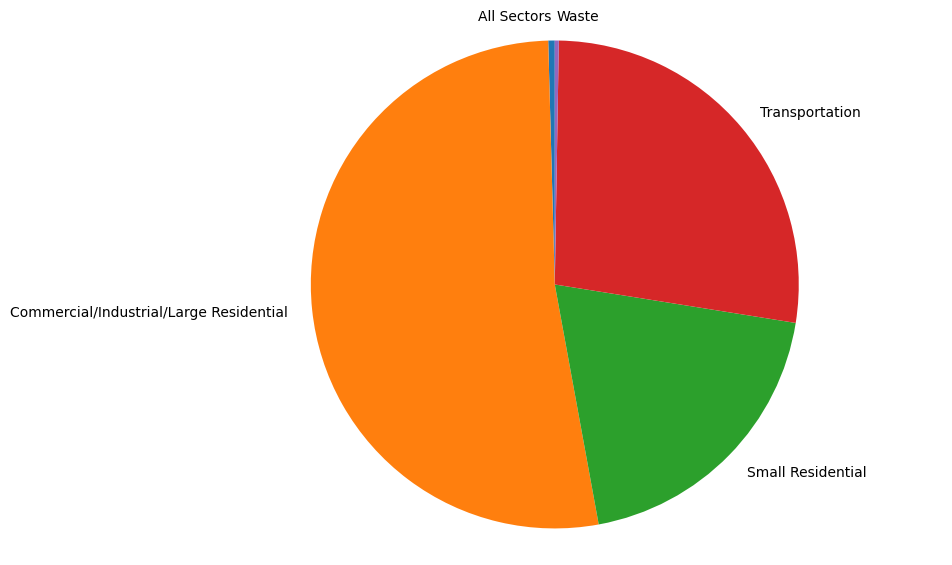

In [19]:
# GHG by Sector
# Convert 'GHG Emissions (mt CO2e)'to string, remove commas, and convert to float
df[' GHG Emissions (mt CO2e) '] = df[' GHG Emissions (mt CO2e) '].astype(str).str.replace(',', '').astype(float)

# Aggregate GHG emissions by sector
sector_emissions = df.groupby('Sector')[' GHG Emissions (mt CO2e) '].sum().reset_index()

# Extract sizes (emissions values) and labels (sector names) for the pie chart
sizes = sector_emissions[' GHG Emissions (mt CO2e) '].tolist() 
labels = sector_emissions['Sector'].tolist()  

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, startangle=90)
plt.axis('equal') 
plt.show()

This pie chart illustrates the greenhouse gas emission values per sector in Boston. It is evident that the most unsustainable sector in Boston is commerical/industrial/large residential real estate. While this sector includes three different types of real estate, it is important to understand what each type consists of; (a) commercial real estate includes office buildings, retail spaces, hotels, medical buildings, (b) industrial real estate includes warehouses, manufacturing facilities, data centers, (c) large residentail real estate includes apartment buildings with over 5 or more units, condominuims, and student housing. While it is evident that this sector has the largest emission, it is not very useful in pinpointing excatly which type of real estate within this category is the leading cause of emissions, if any. Hence, we decided to conduct further exploration of energy source per sector to further understand the leading cause of emissions in Boston. 

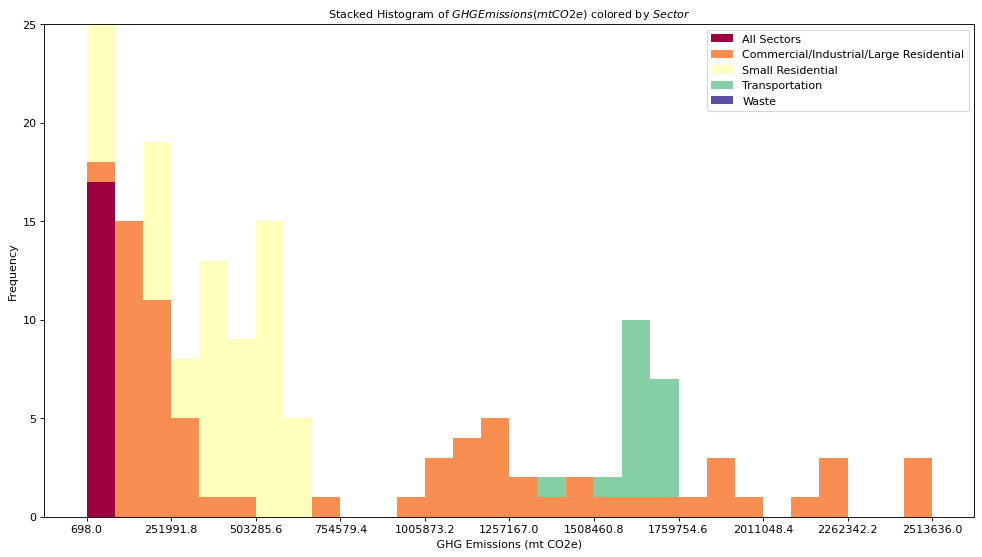

In [24]:
# https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#2.-Bubble-plot-with-Encircling

import numpy as np

# Prepare data
x_var = ' GHG Emissions (mt CO2e) '
groupby_var = 'Sector'
df_agg = df.groupby(groupby_var)
vals = [group[x_var].values.tolist() for name, group in df_agg]

# Draw
plt.figure(figsize=(15,8), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=10)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

In [ ]:
# Group by 'Sector' and 'Source', then sum GHG emissions
emissions_summary = df.groupby(['Sector', 'Source'])[' GHG Emissions (mt CO2e) '].sum().reset_index()
# Initialize dictionary 
most_efficient_sources = {}

# Iterate through each  sector
for sector in emissions_summary['Sector'].unique():
    sector_data = emissions_summary[emissions_summary['Sector'] == sector]
    most_efficient_row = sector_data.loc[sector_data[' GHG Emissions (mt CO2e) '].idxmin()]
    
    # Update dictionary
    most_efficient_sources[sector] = most_efficient_row['Source']
# Print 
for sector, source in most_efficient_sources.items():
    print(f"Most Efficient Source in {sector}: {source}")

Most Efficient Source in All Sectors: Fugitive gas
Most Efficient Source in Commercial/Industrial/Large Residential: Steam
Most Efficient Source in Small Residential: Steam
Most Efficient Source in Transportation: Massport CNG
Most Efficient Source in Waste: Compost


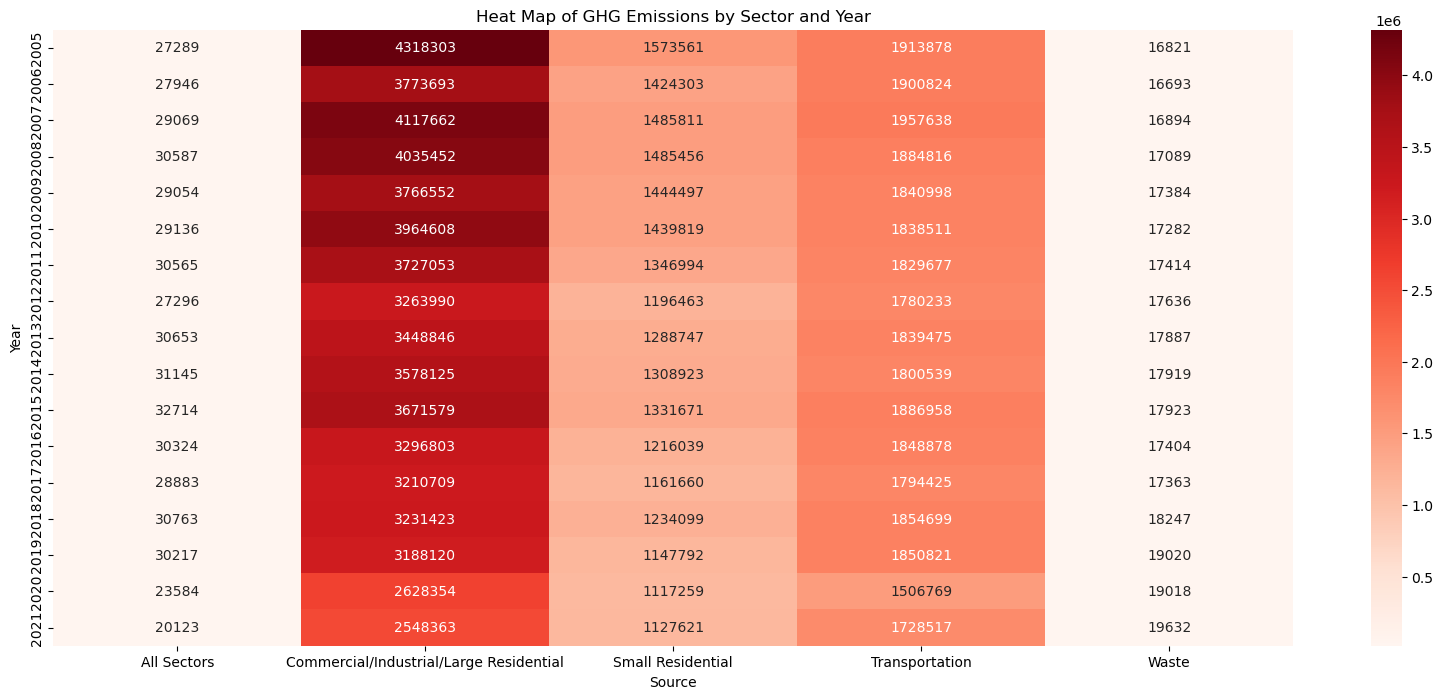

In [23]:
# Create a pivot table
pivot_table = df.pivot_table(values=' GHG Emissions (mt CO2e) ', index='Year (Calendar Year)', columns='Sector', aggfunc='sum')

# Generate the heat map for 
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt=".0f")
plt.title('Heat Map of GHG Emissions by Sector and Year')
plt.xlabel('Source')
plt.ylabel('Year')
plt.show()

This heatmap gave us a clear understanding of which real estate sector is emitting the most greenhouse gas per year. From this data visualization we can infer that in the commercial real estate sector, is by far utilizing the most ineffecient sources electricity, natural gas, and fuel oil respectively and thus has seen minimal improvement over time with the most notable progress happening in 2020 and 2021. 
 Both small residential and large residential real estate use the same sources of energy most frequently, with steam being the most effecient. It is important to note here that the reason for this overlap in energy source is the availability and infrastructure in Boston making these energy sources widely available. These sources are also considered reliable, as they offer consistent energy - an important factor in Boston where heating and hot water is critical for residentail real estate. These sources are also cost-effective with the lowest market price for both property types. Lastly, commercial real estate enforces strict regulations for the type of energy allowed, and electricity, fuel ouil, and natural gases typically meet saftey requirements. 

While steam can be environmentally friendly when generated using renewable energy sources or high-efficiency processes, it's not as commonly used in modern buildings for reasons such as the Boston infrastructure does not currently support the complex piping needed for steam transportation. However, through a process called retrofitting, residential units and buildings can be remodelled to support steam energy, although the process of retrofitting itself is costly. Other reasons for the lack of use of steam includes is ineffeciency, saftey concerns due to high pressure steam, concerns of property damage, and the high cost of maintenance. 
Another important takeaway from our heatmap is that in Transportation, the most energy source comes from vehicle fuel, meaning that most greenhouse gas emission is coming from privately owned vehicles instead of public transportation. We can infer from this that Boston should incentivise more use of public transprotation to decrease GHG emissions. 

In [ ]:
# https://plotly.com/python/sankey-diagram/

import plotly.graph_objects as go

# Create mappings for sectors and sources to integers
sector_ids = {sector: i for i, sector in enumerate(df['Sector'].unique())}
source_ids = {source: i + len(sector_ids) for i, source in enumerate(df['Source'].unique())}

# creat lists for source, target, and value
sources = []
targets = []
values = []

for _, row in df.iterrows():
    source_index = sector_ids[row['Sector']]
    target_index = source_ids[row['Source']]
    value = row[' GHG Emissions (mt CO2e) ']

    sources.append(source_index)
    targets.append(target_index)
    values.append(value)

# Define colors or use a default gradient
colors = ['rgba(%d, %d, %d, 0.6)' % (i, i * 10, i * 20) for i in range(len(sources))]

# Visualize Sankey Diagram 
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,  
        thickness=20,
        line=dict(color='black', width=0.5),
        label=list(sector_ids.keys()) + list(source_ids.keys()),  
        color='green'
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    ))])

fig.update_layout(title_text="Sankey Diagram of GHG Emissions by Sector and Source", font_size=10)
fig.show()

In Boston, like in many other urban areas, the use of electricity in commercial real estate is a significant concern for energy consumption and environmental impact. To address this issue, focusing on incentivizing electricity substitutes in large residential sectors could be particularly impactful. Boston's climate and geography offer opportunities for various renewable energy sources, such as solar power, wind power, and potentially even hydroelectric power due to its proximity to bodies of water like the Charles River. An important consideration here is that while Boston has incentivised various solar power companies to develop solar panels on top of small residentail units for the use of family houses etc. The biggest concern for GHG emissions is in large residential, thus Boston should encourage solar power companies to work with office buidings, companies, warehouses, and retail shops. Additionally, Boston's commitment to sustainability and renewable energy initiatives aligns well with promoting alternatives like geothermal energy and biomass energy. By encouraging the adoption of these substitutes, Boston can reduce reliance on traditional electricity sources in commercial real estate, leading to a more sustainable and resilient energy future for the city.